In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e9/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e9/test.csv')

In [3]:
train.head(4)

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05


In [4]:
train.describe(include='all')

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,2703.000000,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,1561.010784,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,1351.500000,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,2703.000000,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,4054.500000,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,5406.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
train.isnull().sum()

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

In [6]:
display(train[0:6].T)
print(train.columns.tolist())

,0,1,2,3,4,5
id,0.00,1.00,2.00,3.00,4.00,5.00
CementComponent,525.00,143.00,289.00,304.00,157.00,350.00
BlastFurnaceSlag,0.00,169.00,134.70,76.00,236.00,0.00
FlyAshComponent,0.00,143.00,0.00,0.00,0.00,0.00
WaterComponent,186.00,191.00,185.70,228.00,192.00,203.00
SuperplasticizerComponent,0.00,8.00,0.00,0.00,0.00,0.00
CoarseAggregateComponent,1125.00,967.00,1075.00,932.00,935.40,1055.00
FineAggregateComponent,613.00,643.00,795.30,670.00,781.20,775.00
AgeInDays,3.00,28.00,28.00,365.00,90.00,7.00
Strength,10.38,23.52,36.96,39.05,74.19,37.43


['id', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent', 'WaterComponent', 'SuperplasticizerComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays', 'Strength']


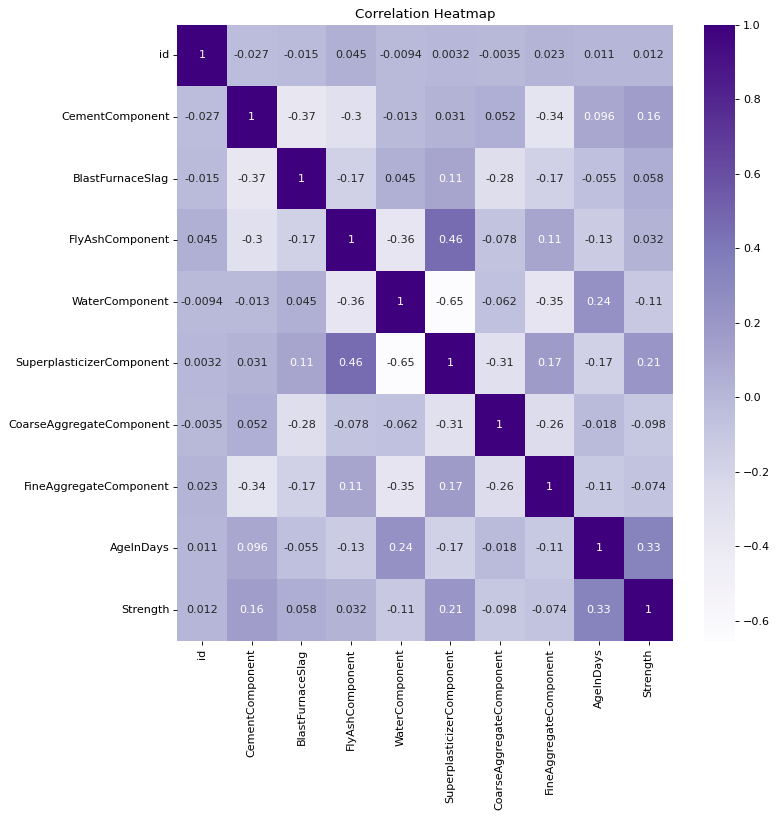

In [7]:
#Mapping the correlation between the data
plt.figure(figsize=(10, 10), dpi=80)
sns.heatmap(train.corr(), cmap="Purples", annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
from sklearn import preprocessing
train_scaled= preprocessing.normalize(train)
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
train_scaled.head()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0.000000,0.375793,0.000000,0.000000,0.133138,0.00000,0.805272,0.438784,0.002147,0.007430
1,0.000829,0.118515,0.140063,0.118515,0.158296,0.00663,0.801426,0.532903,0.023206,0.019493
2,0.001441,0.208219,0.097049,0.000000,0.133794,0.00000,0.774518,0.573000,0.020174,0.026629
3,0.002370,0.240149,0.060037,0.000000,0.180111,0.00000,0.736245,0.529275,0.288336,0.030848
4,0.003147,0.123501,0.185644,0.000000,0.151032,0.00000,0.735811,0.614513,0.070796,0.058360


In [10]:
y = train_scaled['Strength']
X = train_scaled.drop('Strength', axis=1)

In [11]:
print(y)
print(X)

0       0.007430
1       0.019493
2       0.026629
3       0.030848
4       0.058360
          ...   
5402    0.002776
5403    0.008845
5404    0.007051
5405    0.007143
5406    0.011328
Name: Strength, Length: 5407, dtype: float64
            id  CementComponent  BlastFurnaceSlag  FlyAshComponent  \
0     0.000000         0.375793          0.000000         0.000000   
1     0.000829         0.118515          0.140063         0.118515   
2     0.001441         0.208219          0.097049         0.000000   
3     0.002370         0.240149          0.060037         0.000000   
4     0.003147         0.123501          0.185644         0.000000   
...        ...              ...               ...              ...   
5402  0.972489         0.080291          0.004321         0.014222   
5403  0.971344         0.062923          0.000000         0.000000   
5404  0.969614         0.053074          0.000000         0.000000   
5405  0.974768         0.067810          0.016844         0.000000  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    